1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

In [38]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'https://raw.githubusercontent.com/wberritt913/DATADAWGS-DATA-620/main/enron_emails_clean.csv'
emails_df = pd.read_csv(data_path)

In [39]:
# Sample one-tenth of the dataset randomly to make it smaller and easier to run
emails_df_sampled = emails_df

In [40]:
# List of main culprits in the Enron scandal
main_culprits = [
    'kenneth.lay@enron.com', 'jeff.skilling@enron.com', 'andrew.fastow@enron.com',
    'richard.causey@enron.com', 'ken.rice@enron.com', 'cliff.baxter@enron.com'
]

In [41]:
#Function to parse the email message
def parse_email(message):
    headers = {}
    lines = message.split('\n')
    for line in lines:
        if ': ' in line:
            key, value = line.split(': ', 1)
            headers[key] = value
        else:
            break
    return headers

In [42]:
# Apply the parsing function to the 'message' column
parsed_emails = emails_df_sampled['message'].apply(parse_email)
parsed_emails_df = pd.json_normalize(parsed_emails)

In [43]:
parsed_emails_df = parsed_emails_df[['From', 'To', 'Subject', 'Date']]

In [44]:
# Combine the parsed data with the sampled dataframe
emails_df_sampled = parsed_emails_df

In [45]:
# Extract sender and recipients, and split recipients into individual email addresses
emails_df_sampled['To'] = emails_df_sampled['To'].str.split(',')
emails_exploded = emails_df_sampled.explode('To')

In [46]:
# Clean up the email addresses and handle NaN values
emails_exploded['From'] = emails_exploded['From'].str.strip()
emails_exploded['To'] = emails_exploded['To'].astype(str).str.strip()

In [47]:
# Remove null emails
emails_exploded = emails_exploded.dropna(subset=['From', 'To'])

In [48]:
# Remove null subjects
emails_exploded = emails_exploded.dropna(subset=['Subject'])

In [49]:
# Fuilter for culprits only
culprits_emails = emails_exploded[
    (emails_exploded['From'].isin(main_culprits)) |
    (emails_exploded['To'].isin(main_culprits))
]

In [50]:
# Define the path to save the CSV file
#output_path = '/Users/willberritt/Downloads/enron_emails_clean.csv'
#culprits_emails.to_csv(output_path, index=False)

In [51]:
# Create a graph from the filtered sender and recipients
G_culprits = nx.from_pandas_edgelist(culprits_emails, 'From', 'To', create_using=nx.DiGraph())

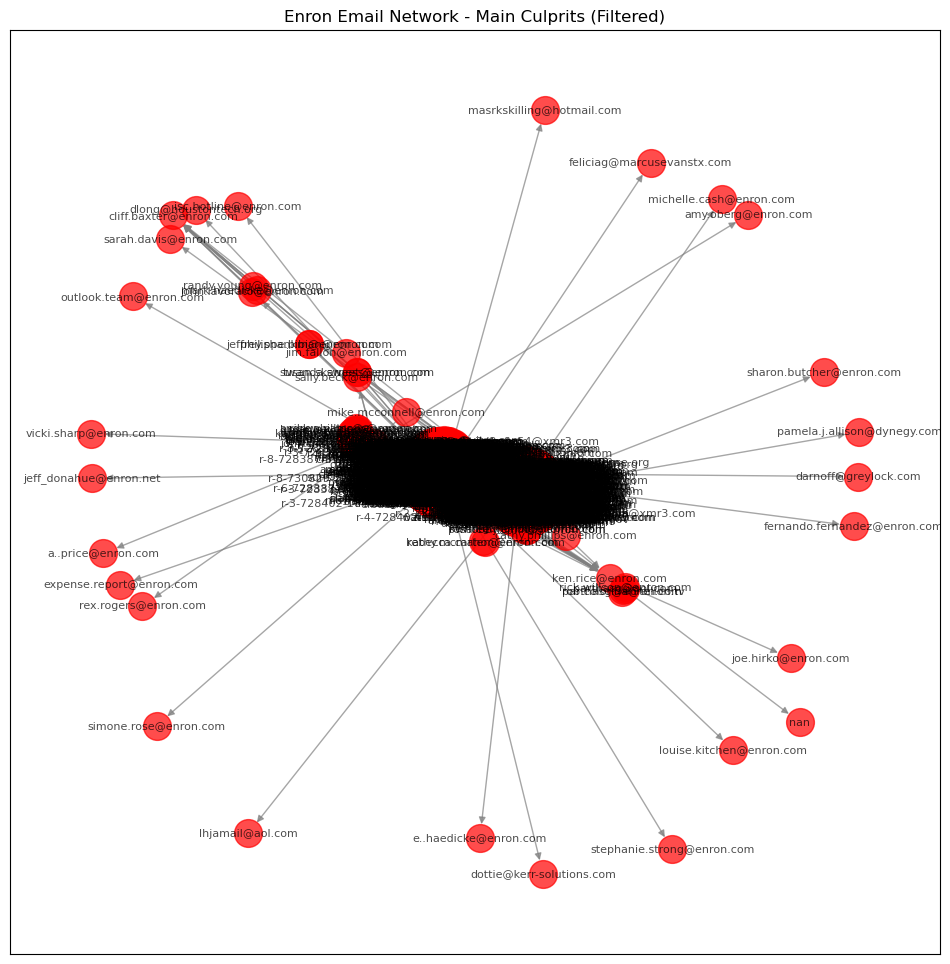

In [52]:
# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_culprits, seed=42)
nx.draw_networkx(G_culprits, pos, font_size=8, node_size=400, node_color='red', edge_color='gray', alpha=0.7)
plt.title("Enron Email Network - Main Culprits (Filtered)")
plt.show()

In [53]:
print(culprits_emails)

                         From                        To  \
4         iris.mack@enron.com     kenneth.lay@enron.com   
5        sally.beck@enron.com  richard.causey@enron.com   
6        sally.beck@enron.com  richard.causey@enron.com   
7        sally.beck@enron.com  richard.causey@enron.com   
8        sally.beck@enron.com  richard.causey@enron.com   
...                       ...                       ...   
3976     greg.piper@enron.com     kenneth.lay@enron.com   
3977  kevin.garland@enron.com        ken.rice@enron.com   
3978     liz.taylor@enron.com   jeff.skilling@enron.com   
3979     greg.piper@enron.com     kenneth.lay@enron.com   
3980     greg.piper@enron.com     kenneth.lay@enron.com   

                                                Subject  \
4     FW: Iris Mack's involvement in the Enron Team ...   
5                         London - Week of January 15th   
6                                  2000 Accomplishments   
7                             Internal Feedback for PRC

In [59]:

# Step 3: Calculate centrality measures
degree_centrality = nx.degree_centrality(G_culprits)
eigenvector_centrality = nx.eigenvector_centrality(G_culprits)


Degree Centrality: {'iris.mack@enron.com': 0.0008857395925597874, 'kenneth.lay@enron.com': 0.5332152347209921, 'sally.beck@enron.com': 0.0044286979627989375, 'richard.causey@enron.com': 0.047829937998228524, 'jeff.skilling@enron.com': 0.5544729849424269, 'cliff.baxter@enron.com': 0.008857395925597875, 'lexi.elliott@enron.com': 0.001771479185119575, 'brent.price@enron.com': 0.001771479185119575, 'fernley.dyson@enron.com': 0.001771479185119575, 'john.echols@enron.com': 0.0008857395925597874, 'philippe.bibi@enron.com': 0.001771479185119575, 'ted.murphy@enron.com': 0.001771479185119575, 'rick.phillips@enron.com': 0.0008857395925597874, 'brenda.herod@enron.com': 0.0008857395925597874, 'mike.jordan@enron.com': 0.001771479185119575, 'charlene.jackson@enron.com': 0.002657218777679362, 'karen.marshall@enron.com': 0.0008857395925597874, 'bryan.seyfried@enron.com': 0.0008857395925597874, 'kristin.gandy@enron.com': 0.0008857395925597874, 'beth.apollo@enron.com': 0.0008857395925597874, 'a..price@en

### Evaluating max centrality

In [61]:
max_degree_centrality = max(degree_centrality, key=degree_centrality.get)
print(f"The node with the highest degree centrality is: {max_degree_centrality} with a value of {degree_centrality[max_degree_centrality]}")

The node with the highest degree centrality is: jeff.skilling@enron.com with a value of 0.5544729849424269


In [62]:
max_eigenvector_centrality = max(eigenvector_centrality, key=eigenvector_centrality.get)
print(f"The node with the highest eigenvector centrality is: {max_eigenvector_centrality} with a value of {eigenvector_centrality[max_eigenvector_centrality]}")

The node with the highest eigenvector centrality is: jeff.skilling@enron.com with a value of 0.6050353271771628


In [63]:
max_top_10_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print(f"The top 10 nodes with the highest degree centrality are: {max_top_10_degree_centrality}")

The top 10 nodes with the highest degree centrality are: {'jeff.skilling@enron.com': 0.5544729849424269, 'kenneth.lay@enron.com': 0.5332152347209921, 'richard.causey@enron.com': 0.047829937998228524, 'ken.rice@enron.com': 0.018600531443755536, 'andrew.fastow@enron.com': 0.0141718334809566, 'cliff.baxter@enron.com': 0.008857395925597875, 'david.delainey@enron.com': 0.006200177147918512, 'greg.whalley@enron.com': 0.005314437555358724, 'sally.beck@enron.com': 0.0044286979627989375, 'vince.kaminski@enron.com': 0.0044286979627989375}


In [64]:
max_top_10_eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print(f"The top 10 nodes with the highest eigenvector centrality are: {max_top_10_eigenvector_centrality}")
max_top

The top 10 nodes with the highest eigenvector centrality are: {'jeff.skilling@enron.com': 0.6050353271771628, 'kenneth.lay@enron.com': 0.2755709441895558, 'christie.patrick@enron.com': 0.1608050455701034, 'david.delainey@enron.com': 0.13147607479484252, 'mark.muller@enron.com': 0.13147607479484252, 'rod.hayslett@enron.com': 0.13147607479484252, 'richard.causey@enron.com': 0.11496009888679892, 'kevinscott@onlinemailbox.net': 0.11048411922811364, 'mary.clark@enron.com': 0.11048411922811364, 'kevin.hannon@enron.com': 0.11048411922811364}


In [68]:
# Extract keys (emails) from both dictionaries
keys_dict1 = set(max_top_10_degree_centrality.keys())
keys_dict2 = set(max_top_10_eigenvector_centrality.keys())

# Find keys that are unique to each dictionary
unique_to_dict1 = keys_dict1 - keys_dict2
unique_to_dict2 = keys_dict2 - keys_dict1
# Print or store the unique keys
print(f"Unique to top deg centrality: {unique_to_dict1}")
print(f"Unique to top eig centrality: {unique_to_dict2}")

Unique to top deg centrality: {'vince.kaminski@enron.com', 'cliff.baxter@enron.com', 'sally.beck@enron.com', 'ken.rice@enron.com', 'greg.whalley@enron.com', 'andrew.fastow@enron.com'}
Unique to top eig centrality: {'christie.patrick@enron.com', 'mary.clark@enron.com', 'rod.hayslett@enron.com', 'kevin.hannon@enron.com', 'mark.muller@enron.com', 'kevinscott@onlinemailbox.net'}


In [69]:
max_top_10_degree_centrality, max_top_10_eigenvector_centrality

({'jeff.skilling@enron.com': 0.5544729849424269,
  'kenneth.lay@enron.com': 0.5332152347209921,
  'richard.causey@enron.com': 0.047829937998228524,
  'ken.rice@enron.com': 0.018600531443755536,
  'andrew.fastow@enron.com': 0.0141718334809566,
  'cliff.baxter@enron.com': 0.008857395925597875,
  'david.delainey@enron.com': 0.006200177147918512,
  'greg.whalley@enron.com': 0.005314437555358724,
  'sally.beck@enron.com': 0.0044286979627989375,
  'vince.kaminski@enron.com': 0.0044286979627989375},
 {'jeff.skilling@enron.com': 0.6050353271771628,
  'kenneth.lay@enron.com': 0.2755709441895558,
  'christie.patrick@enron.com': 0.1608050455701034,
  'david.delainey@enron.com': 0.13147607479484252,
  'mark.muller@enron.com': 0.13147607479484252,
  'rod.hayslett@enron.com': 0.13147607479484252,
  'richard.causey@enron.com': 0.11496009888679892,
  'kevinscott@onlinemailbox.net': 0.11048411922811364,
  'mary.clark@enron.com': 0.11048411922811364,
  'kevin.hannon@enron.com': 0.11048411922811364})

In [ ]:

# Assuming G_culprits is your graph object

# Calculate the degree of each node (number of connections)
node_degrees = dict(G_culprits.degree())

# Filter nodes by degree, e.g., keep only the top 10% of nodes by degree
degree_threshold = sorted(node_degrees.values(), reverse=True)[int(len(node_degrees) * 0.1)]
nodes_with_most_connections = {node for node, degree in node_degrees.items() if degree >= degree_threshold}

# Position nodes using the spring layout
pos = nx.spring_layout(G_culprits, seed=42)

# Plot the graph
plt.figure(figsize=(12, 12))
# Draw all nodes
nx.draw_networkx_nodes(G_culprits, pos, node_size=400, node_color='red', alpha=0.7)
# Draw all edges
nx.draw_networkx_edges(G_culprits, pos, edge_color='gray', alpha=0.7)
# Draw labels only for nodes with the most connections
nx.draw_networkx_labels(G_culprits, pos, labels={node: node for node in nodes_with_most_connections}, font_size=8)
plt.title("Enron Email Network - Main Culprits (Filtered)")
plt.show()